In [1]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [32]:
import os
import sys
sys.path.append('../../tools/')
from fits2ascii import fits2ascii

In [4]:
mjd_peak = 2458986.91
mjd_exp = 2459009.96090

In [5]:
Sci_folder = './gemini_gnirs_pypeit/gemini_gnirs_A/Science/'
ls = [
    i for i in os.listdir(Sci_folder)
    if ('SN2020jgb' in i and 'fits' in i and 'spec1d' in i and 'GNIRS' in i)
]
ls_cal = [
    i for i in os.listdir(Sci_folder)
    if ('HIP' in i and 'fits' in i and 'spec1d' in i)
]

## Standard stars

In [6]:
f = fits.open(Sci_folder+ls_cal[0])
f.info()
print(repr(f[0].header))
f.close()

Filename: ./gemini_gnirs_pypeit/gemini_gnirs_A/Science/spec1d_N20200609S0043-HIP95793_GNIRS_20200609T114012.285.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  OBJ0773-DET01-ORDER0008    1 BinTableHDU     79   1022R x 18C   [1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  2  OBJ0773-DET01-ORDER0007    1 BinTableHDU     79   1022R x 18C   [1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  3  OBJ0773-DET01-ORDER0006    1 BinTableHDU     79   1022R x 18C   [1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  4  OBJ0773-DET01-ORDER0005    1 BinTableHDU     79   1022R x 18C   [1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  5  OBJ0773-DET01-ORDER0004    1 BinTableHDU     79   1022R x 18C   [1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  6  OBJ0773-DET01-ORDER0003    1 BinTableHDU

In [7]:
output = 'HIP95793_GNIRS_coadd.fits'
#os.system('cp {} {}'.format(Sci_folder + ls_cal[1], Sci_folder + output))

0

[8229.3147265  8231.58307018] [9446.38268234 9448.75776029]
[8229.31334026 8231.58327147] [9446.38448606 9448.75945157]
[8228.24056545 8230.53084624] [9447.10613661 9449.49345167]
[8228.19295977 8230.48318751] [9447.11216688 9449.50702055]
[8755.22005916 8757.94965301] [10788.49660662 10791.22146005]
[8755.22178362 8757.95041318] [10788.4730919  10791.20067679]
[8754.46492516 8757.27550168] [10789.59499897 10792.33285266]
[8754.46072509 8757.27425969] [10789.59882967 10792.33495754]
[9327.18223366 9330.28316983] [12585.63625459 12588.80227668]
[9327.19004271 9330.28909636] [12585.6108317  12588.77654356]
[9326.64244239 9329.77557185] [12586.94567578 12590.1332935 ]
[9326.63845469 9329.76634479] [12586.95100864 12590.14256779]
[11176.71958114 11180.52384004] [15101.77349571 15105.6304319 ]
[11176.72556782 11180.52809163] [15101.74727904 15105.60513202]
[11177.06659198 11180.83777533] [15103.18824257 15107.05281854]
[11177.07259499 11180.84595619] [15103.18559168 15107.04797449]
[13964.3

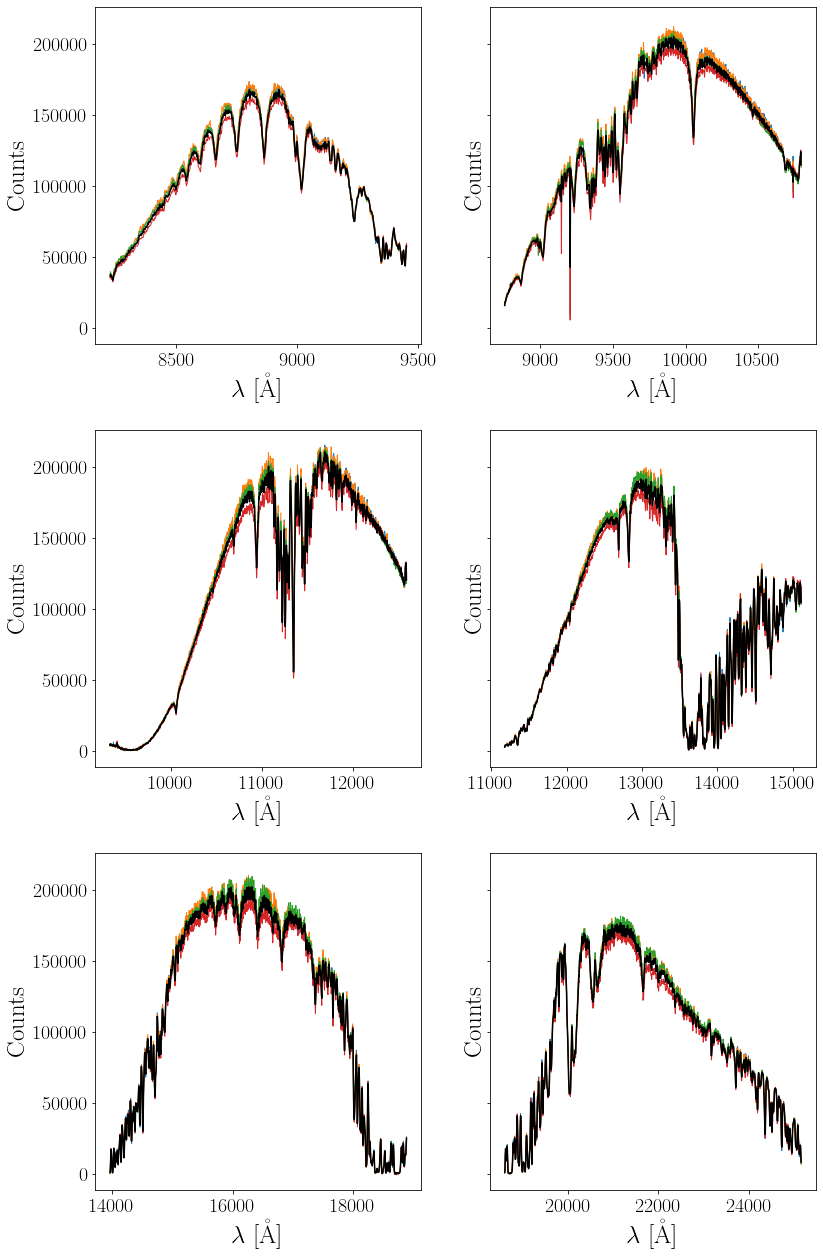

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18), sharey=True)
ax = ax.flatten()
for k in np.arange(6) + 1:
    Wav = None
    Counts = None
    Mask = None
    for m, l in enumerate(ls_cal):
        f = fits.open(Sci_folder + l)
        specdata = f[k].data
        mask = specdata['OPT_MASK']
        wav = specdata['OPT_WAVE']
        counts = specdata['OPT_COUNTS']
        print(wav[mask][0:2], wav[mask][-3:-1])
        f.close()
        
        ###co-adding
        if m == 0:
            Wav = wav
            Counts = counts
            Mask = mask
        elif m != 1:
            Wav += wav
            Counts += counts
            Mask = [i and j for (i, j) in zip(Mask, mask)]
        #plt.xlim(wav[wav > 8200][0], wav[wav > 8200][-1])
        ax[k-1].plot(wav[mask], counts[mask], linewidth=1)
    Wav = Wav/(len(ls_cal)-1)
    Counts = Counts/(len(ls_cal)-1)
    ax[k-1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    ax[k-1].set_ylabel(r'$\mathrm{Counts}$')
    
    with fits.open(Sci_folder + output, 'update') as fout:
        fout[k].data['OPT_MASK'] = Mask
        fout[k].data['OPT_WAVE'] = Wav
        fout[k].data['OPT_COUNTS'] = Counts
        fout.flush()
        
    with fits.open(Sci_folder + output) as fout:
        mask = fout[k].data['OPT_MASK']
        wav = fout[k].data['OPT_WAVE']
        counts = fout[k].data['OPT_COUNTS']
        ax[k-1].plot(wav[mask], counts[mask], color='k')
fig.tight_layout()
plt.show()

[18606.75330239 18613.13299646] [25136.88181669 25143.32273244]
[18606.72228358 18613.11150503] [25136.74472249 25143.15286554]
[18610.17017926 18616.59279253] [25143.24850666 25149.62533123]
[18610.26878469 18616.69396461] [25143.40577148 25149.84847724]


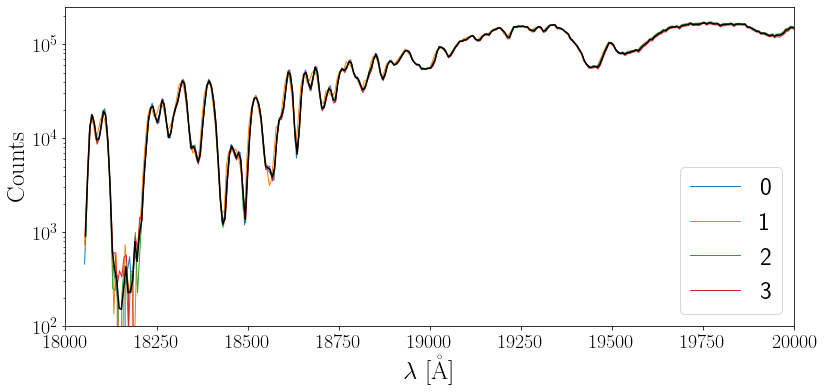

In [9]:
fig, ax = plt.subplots(figsize=(12, 6), sharey=True)
Wav = None
Counts = None
Mask = None
for m, l in enumerate(ls_cal):
    f = fits.open(Sci_folder + l)
    specdata = f[6].data
    mask = specdata['OPT_MASK']
    wav = specdata['OPT_WAVE']
    counts = specdata['OPT_COUNTS']
    print(wav[mask][0:2], wav[mask][-3:-1])
    f.close()

    ###co-adding
    if m == 0:
        Wav = wav
        Counts = counts
        Mask = mask
    else:
        Wav += wav
        Counts += counts
        Mask = [i and j for (i, j) in zip(Mask, mask)]
    #plt.xlim(wav[wav > 8200][0], wav[wav > 8200][-1])
    ax.plot(wav[mask]/(1+0.0307), counts[mask], linewidth=1, label=m)
Wav = Wav/len(ls_cal)
Counts = Counts/len(ls_cal)
with fits.open(Sci_folder + output) as fout:
    mask = fout[6].data['OPT_MASK']
    wav = fout[6].data['OPT_WAVE']
    counts = fout[6].data['OPT_COUNTS']
    ax.plot(wav[mask]/(1+0.0307), counts[mask], color='k')
ax.set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
ax.set_ylabel(r'$\mathrm{Counts}$')
ax.set_yscale('log')
ax.set_xlim(18000, 20000)
ax.set_ylim(1e2, 2.5e5)
fig.tight_layout()
plt.legend()
plt.show()

## Sensitivity function

(numpy.record, [('SENS_WAVE', '>f8', (41990,)), ('SENS_COUNTS_PER_ANG', '>f8', (41990,)), ('SENS_ZEROPOINT', '>f8', (41990,)), ('SENS_ZEROPOINT_GPM', 'i1', (41990,)), ('SENS_ZEROPOINT_FIT', '>f8', (41990,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41990,)), ('SENS_COEFF', '>f8', (7,)), ('ECH_ORDERS', '>i8'), ('POLYORDER_VEC', '>i8'), ('WAVE_MIN', '>f8'), ('WAVE_MAX', '>f8')])


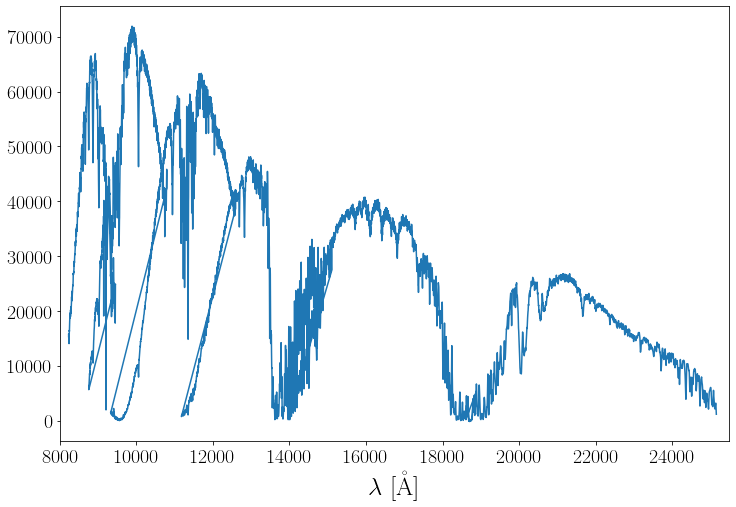

In [12]:
Flux_folder = './gemini_gnirs_pypeit/gemini_gnirs_A/Fluxing/'
Wav = []
S = []
plt.figure(figsize=(12, 8))
for i in np.arange(44, 45):
    f = fits.open(Flux_folder + 'sens_HIP95793_{}.fits'.format(i))
    #print(f.info())
    sens = f[2].data
    print(sens.dtype)
    wav = np.array(sens['SENS_WAVE'])
    s = sens['SENS_COUNTS_PER_ANG']
    S.append(s)
    plt.plot(wav[wav!=0], s[wav!=0])
    Wav.append(sens['SENS_WAVE'])
    plt.xlim(8000, 25500)
    plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    #plt.show()
    f.close()
#Wav = np.mean(Wav, axis=0)
#S = np.mean(S, axis=1)
#Wav.shape

## Calibrated spectrum for each exposure

Standard star: HIP95793
- Spectral type: $A_0$
- $M_V=5.783$

spec1d_N20200609S0011-SN2020jgb_GNIRS_20200609T104906.269.fits
OBJ0642-DET01-ORDER0008
OBJ0642-DET01-ORDER0007
OBJ0642-DET01-ORDER0006
OBJ0642-DET01-ORDER0005
OBJ0642-DET01-ORDER0004
OBJ0642-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

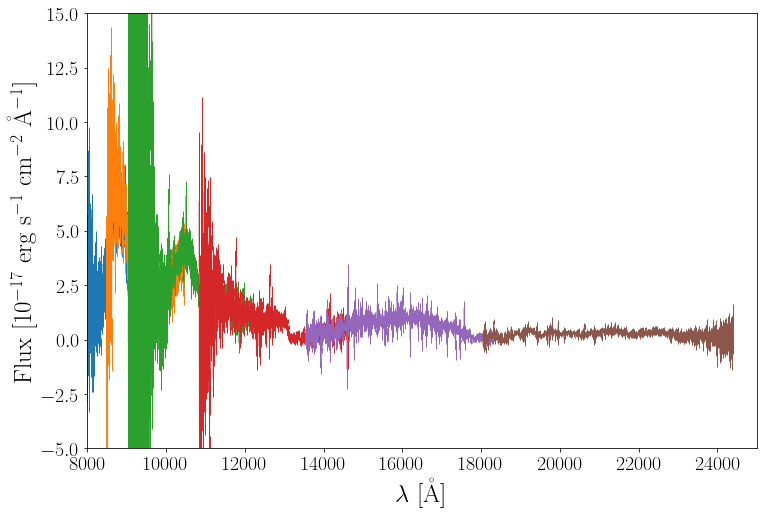

spec1d_N20200609S0012-SN2020jgb_GNIRS_20200609T105430.352.fits
OBJ0196-DET01-ORDER0008
OBJ0196-DET01-ORDER0007
OBJ0196-DET01-ORDER0006
OBJ0196-DET01-ORDER0005
OBJ0196-DET01-ORDER0004
OBJ0196-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

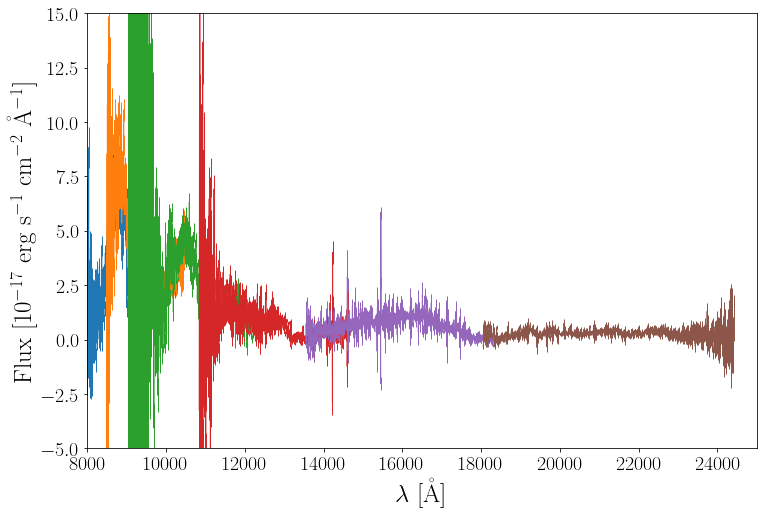

spec1d_N20200609S0013-SN2020jgb_GNIRS_20200609T105951.402.fits


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0194-DET01-ORDER0008
OBJ0194-DET01-ORDER0007
OBJ0194-DET01-ORDER0006
OBJ0194-DET01-ORDER0005
OBJ0194-DET01-ORDER0004
OBJ0194-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


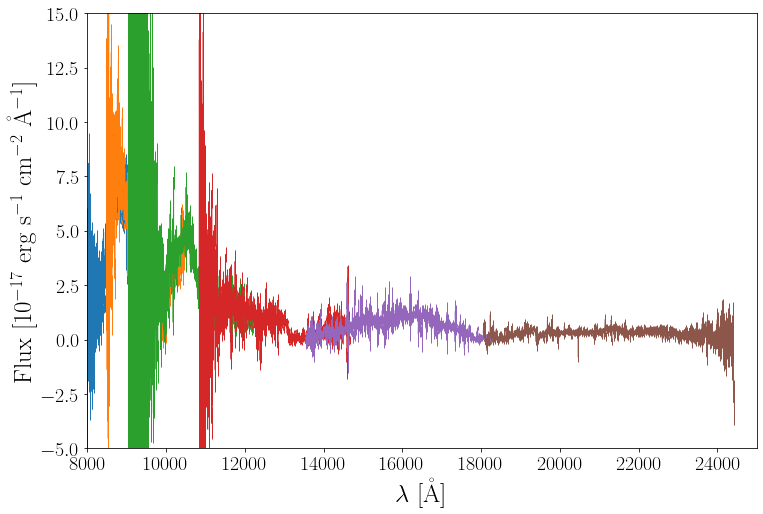

spec1d_N20200609S0014-SN2020jgb_GNIRS_20200609T110515.435.fits
OBJ0636-DET01-ORDER0008
OBJ0636-DET01-ORDER0007
OBJ0636-DET01-ORDER0006
OBJ0636-DET01-ORDER0005
OBJ0636-DET01-ORDER0004
OBJ0636-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

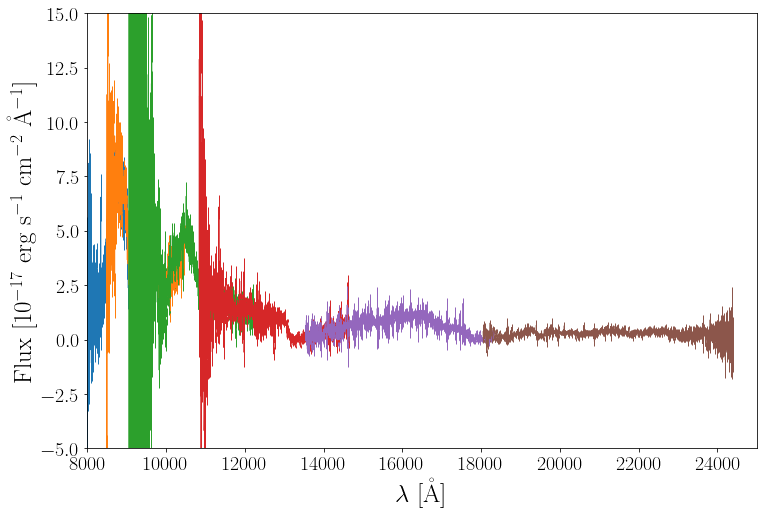

spec1d_N20200609S0015-SN2020jgb_GNIRS_20200609T111036.452.fits
OBJ0632-DET01-ORDER0008


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0632-DET01-ORDER0007
OBJ0632-DET01-ORDER0006
OBJ0632-DET01-ORDER0005
OBJ0632-DET01-ORDER0004
OBJ0632-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


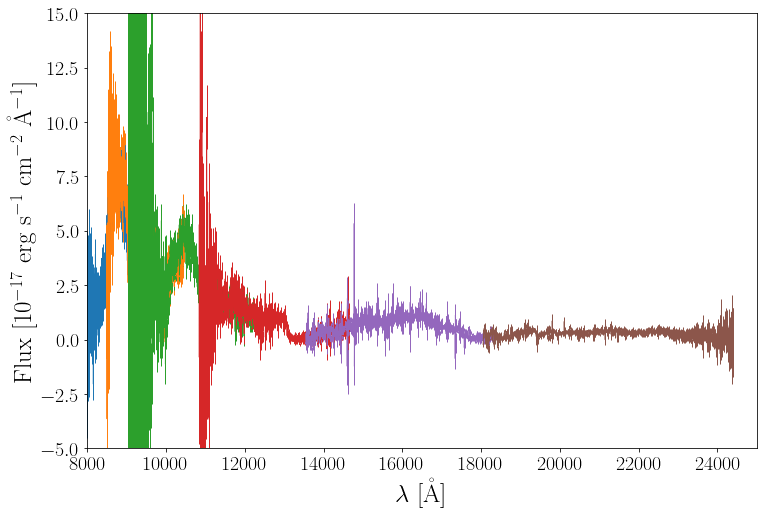

spec1d_N20200609S0016-SN2020jgb_GNIRS_20200609T111600.402.fits


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0184-DET01-ORDER0008
OBJ0184-DET01-ORDER0007


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0184-DET01-ORDER0006
OBJ0184-DET01-ORDER0005
OBJ0184-DET01-ORDER0004
OBJ0184-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


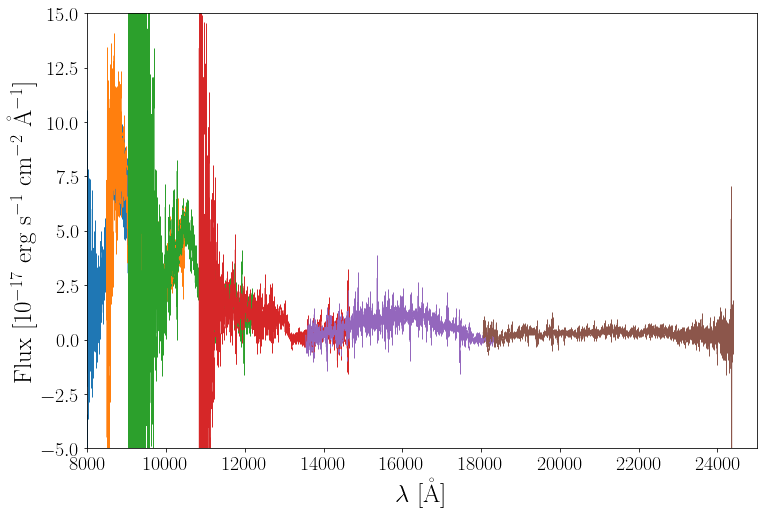

spec1d_N20200609S0017-SN2020jgb_GNIRS_20200609T112121.352.fits
OBJ0182-DET01-ORDER0008
OBJ0182-DET01-ORDER0007
OBJ0182-DET01-ORDER0006


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0182-DET01-ORDER0005
OBJ0182-DET01-ORDER0004
OBJ0182-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


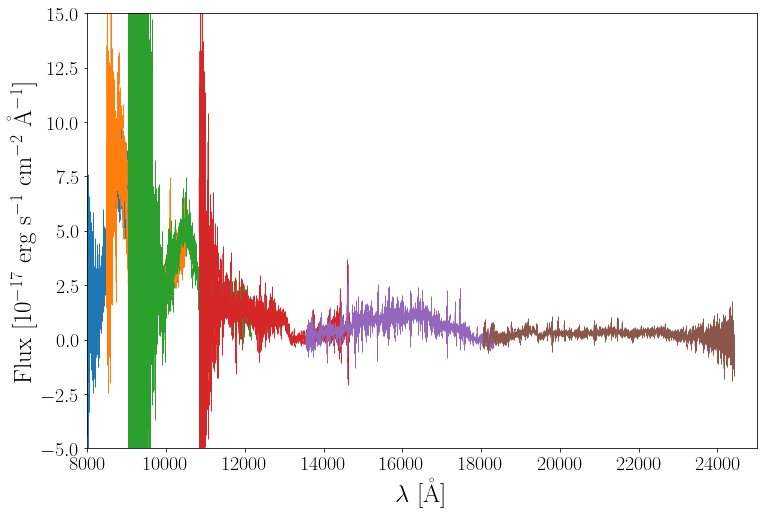

spec1d_N20200609S0018-SN2020jgb_GNIRS_20200609T112645.702.fits


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0624-DET01-ORDER0008
OBJ0624-DET01-ORDER0007
OBJ0624-DET01-ORDER0006


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0624-DET01-ORDER0005
OBJ0624-DET01-ORDER0004
OBJ0624-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_71339/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


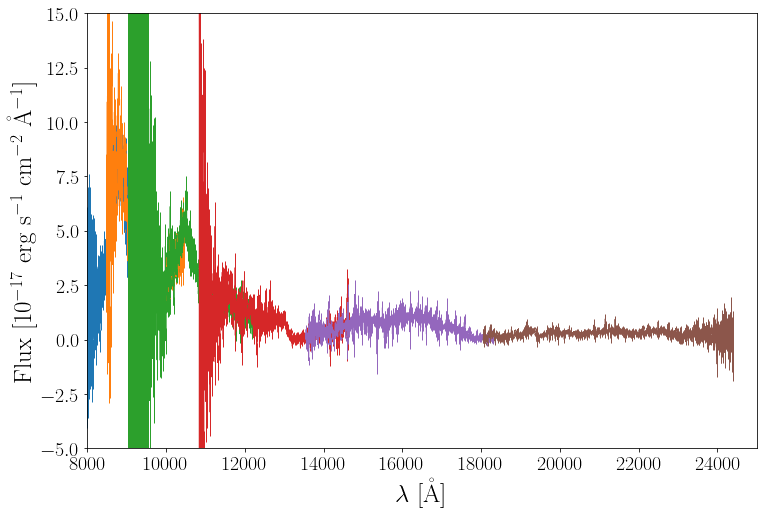

In [13]:
ls.sort()
for m, l in enumerate(ls):
    plt.figure(figsize=(12, 8))
    print(l)
    for k in np.arange(6) + 1:
        f = fits.open(Sci_folder + l)
        if len(f) > 8:
            specdata = f[k + 6].data
            print(f[k + 6].header['NAME'])
        else:
            specdata = f[k].data
            print(f[k].header['NAME'])
        wav = specdata['OPT_WAVE']
        #print(specdata)
        flux = specdata['OPT_FLAM']
        unc = specdata['OPT_FLAM_IVAR']**-.5
        f.close()
        plt.errorbar(wav[wav > 8200] / (1 + 0.0307),
                     flux[wav > 8200],
                     yerr=unc[wav > 8200],
                     linewidth=1)
        plt.xlim(8000, 25000)
        plt.ylim(-5, 15)
        plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
        plt.ylabel(
            r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
        )
    plt.show()

## Telluric correction

In [14]:
def data_binning(x, y, bins=5):
    N = len(x) // bins
    X, Y = [], []
    for i in range(N):
        X = np.append(X, x[bins*i:bins*(i+1)].mean())
        Y = np.append(Y, y[bins*i:bins*(i+1)].mean())
    return (X, Y)

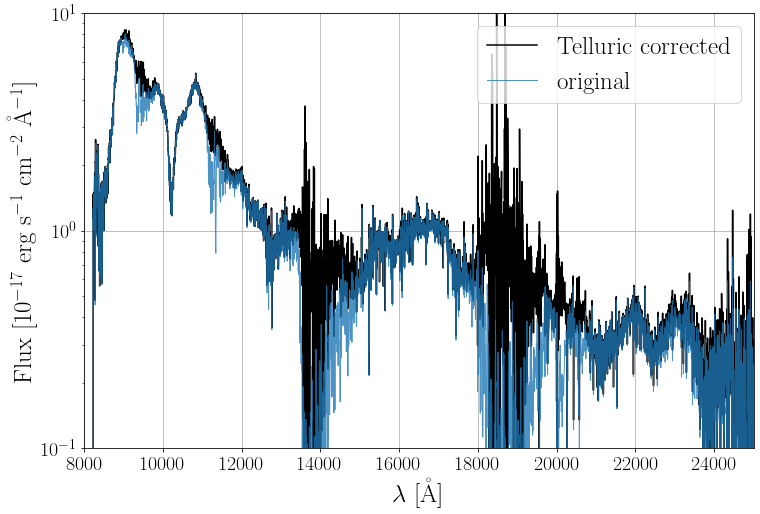

In [20]:
Tell_folder = './gemini_gnirs_pypeit/gemini_gnirs_A/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_tellmodel.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
fmodel.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']

plt.plot(wav,
         flux,
         color='k',
         label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
plt.plot(model[0]['WAVE'],
         flux * model[0]['TELLURIC'],
         linewidth=1,
         alpha=0.8,
         label=r'$\mathrm{original}$')
plt.xlim(8000, 25000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylim(1e-1, 1e1)
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()

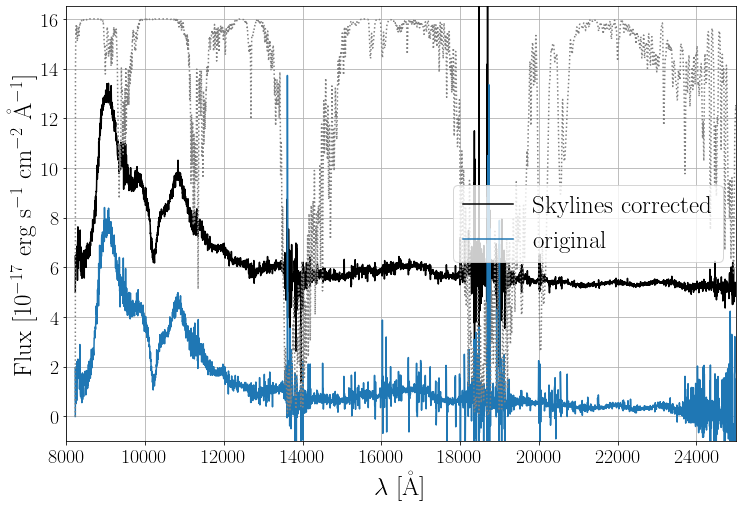

In [51]:
Tell_folder = './gemini_gnirs_pypeit/gemini_gnirs_A/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
specdata = f[1].data
f.close()

fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_tellmodel.fits')
model = fmodel[1].data

Tell_folder = './gemini_gnirs_pypeit_backup/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
specdata0 = f[1].data
f.close()

plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']

plt.plot(wav,
         flux + 5,
         color='k',
         label=r'$\mathrm{Skylines\ corrected}$')

wav = specdata0['wave']
flux = specdata0['flux']

plt.plot(wav,
         flux,
         label=r'$\mathrm{original}$')

plt.plot(model[0]['WAVE'],
         model[0]['TELLURIC'] * 16,
         color='0.5',
         linestyle=':')

plt.xlim(8000, 25000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
#plt.yscale('log')
plt.ylim(-1, 16.5)
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()

In [17]:
def lambda_rf(lambda0, vel):
    c = 2.99792458e5
    lambda_rf = lambda0 * ((1 + vel / c) / (1 - vel / c))**.5
    return lambda_rf

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


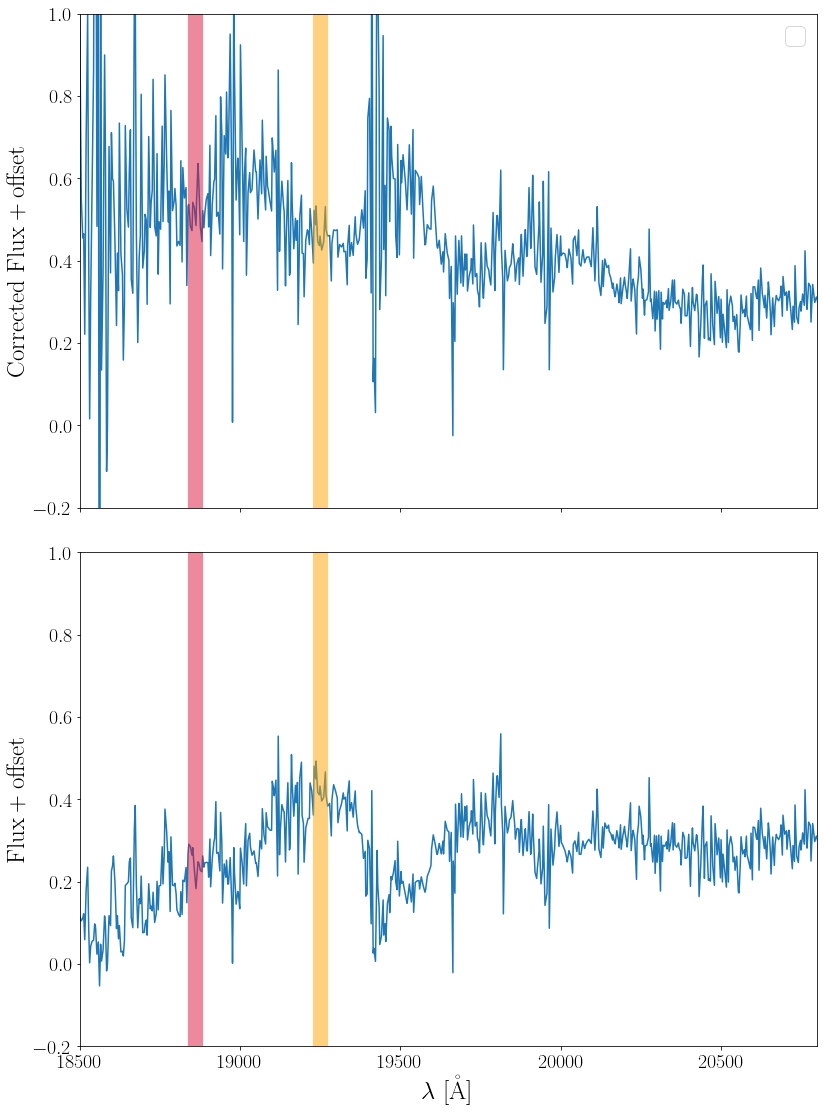

<Figure size 864x576 with 0 Axes>

In [31]:
Tell_folder = 'gemini_gnirs_pypeit/gemini_gnirs_A/Telluric/'
fig, ax = plt.subplots(2, 1, figsize=(12, 16), sharex=True)
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
model = fmodel[1].data
fmodel.close()
plt.figure(figsize=(12, 8))
tell = model['telluric']
wav = model['wave']
flux = model['flux']
ax[0].plot(wav / (1 + 0.0307), tell + 5, '--k')
ax[0].plot(wav / (1 + 0.0307), flux)
ax[1].plot(wav / (1 + 0.0307), flux * tell)
ax[1].set_xlim(18500, 20800)
ax[0].set_ylim(-.2, 1)
ax[1].set_ylim(-.2, 1)
ax[1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
ax[0].set_ylabel(r'$\mathrm{Corrected\ Flux}+\mathrm{offset}$')
ax[1].set_ylabel(r'$\mathrm{Flux}+\mathrm{offset}$')
ax[0].legend()
ax[0].axvline(lambda_rf(20581, -26115),
              color='crimson',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[0].axvline(lambda_rf(20581, -20000),
              color='orange',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[1].axvline(lambda_rf(20581, -26115),
              color='crimson',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[1].axvline(lambda_rf(20581, -20000),
              color='orange',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
fig.tight_layout()
plt.show()

/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/GNIRS_reduction/../../tools/fits2ascii.py:33: RuntimeWarning: divide by zero encountered in power
  unc = sn[1].data["ivar"] ** -0.5


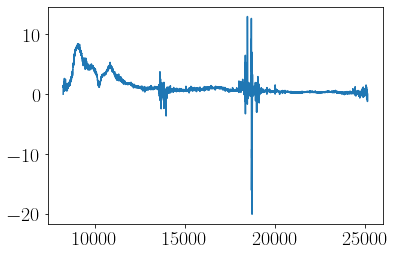

In [35]:
fits2ascii('./gemini_gnirs_pypeit/gemini_gnirs_A/Telluric/SN2020jgb_coadd_tellcorr.fits', output='../SN2020jgb/ZTF20aayhacx_20200609_Gemini-N.ascii')